In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [2]:
plt.rcParams["figure.dpi"] =150
ss =30
plt.rc('axes', titlesize=ss) #fontsize of the title
# plt.rc("xticks", size=ss)
plt.rc('axes', labelsize=ss) #fontsize of the x and y labels
plt.rc('legend', fontsize=ss*2/3) #fontsize of the legend

In [9]:
totals = {"nuscan-exp":[0.610408, 7.23677, 59.2501], 
          "uscan-exp":[0.566008, 13.4319, 63.8978], 
          "nuscan-normal":[0.59107, 16.197, 72.5104], 
          "uscan-normal":[0.804968, 87029.6, 3990.34], 
          "nuscan-uniform":[9.96582, 1253.42, 2494.01],
          "uscan-uniform":[48.2934, 172800, 172800]}
df = pd.DataFrame(totals, index=["enron", "cnr-2000", "uk-2014-tpd"])

In [10]:
48*3600


172800

In [11]:
def make_bar_plot(plotdata, savename, title="", ylab="Runtime (seconds)"):
    
    mpl.style.use("seaborn")
    ss =30
    plt.rc('axes', titlesize=ss) #fontsize of the title
    # plt.rc("xticks", size=ss)
    plt.rc('axes', labelsize=ss) #fontsize of the x and y labels
    plt.rc('legend', fontsize=ss/2) #fontsize of the legend
    plotdata.plot(kind="bar",figsize=(15, 8), colormap = "Paired")
    
    #plt.title(title)
    plt.semilogy()
    plt.xlabel("Data Sets")

    plt.ylabel(ylab)
    #to increase y ticks size
    plt.yticks(size=ss//1.5)

    #to increase x ticks 
    plt.xticks(size=ss//1.5, rotation=45)
    plt.tight_layout()
#     plt.savefig(savename) #"runtime_Nu_U_t100.png"
    plt.show()

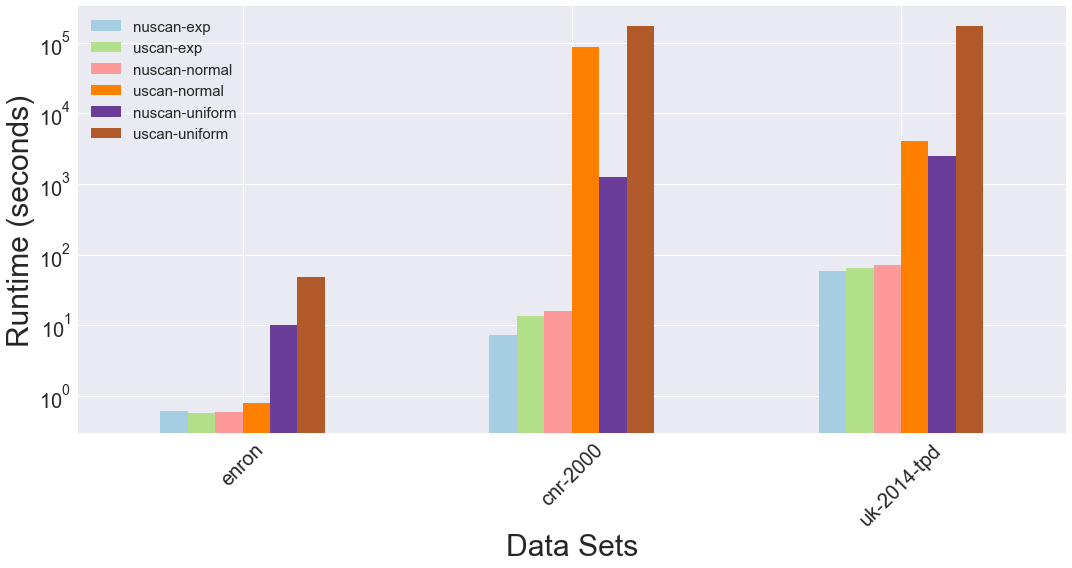

In [12]:
make_bar_plot(df, "../results/enron_cnr_uk/plots/bar_nuscan_uscan_compare_diff_distro.png")